**Question 3** :- Kuwahara Filter :  It is a non-linear filter which is used for smoothing the image and for edge preservation. It is effective in reducing the noise while maintaining sharp edges and fine details in the Image. As it is a non linear filter it processes pixel values in a way that is not simply based on the linear combinations. This filter is designed to smooth out an image while preserving important features.

In [3]:
import numpy as np
from PIL import Image

def kuwahara_filter(image):
    img = np.array(image.convert('L'))  # Convert to grayscale
    height, width = img.shape
    output = np.zeros_like(img)

    for y in range(2, height - 2):
        for x in range(2, width - 2):
            # Define the four regions
            regions = [
                img[y - 2:y + 3, x - 2:x + 3],  # Region 1
                img[y - 2:y + 3, x - 1:x + 4],  # Region 2
                img[y - 1:y + 4, x - 2:x + 3],  # Region 3
                img[y - 1:y + 4, x - 1:x + 4]   # Region 4
            ]

            # Calculate mean and variance for each region
            means = []
            variances = []
            for region in regions:
                means.append(np.mean(region))
                variances.append(np.var(region))

            # Select the region with the minimum variance
            min_variance_index = np.argmin(variances)
            output[y, x] = means[min_variance_index]

    return Image.fromarray(output)

input_image = Image.open('tree.png')
filtered_image = kuwahara_filter(input_image)
filtered_image.show()

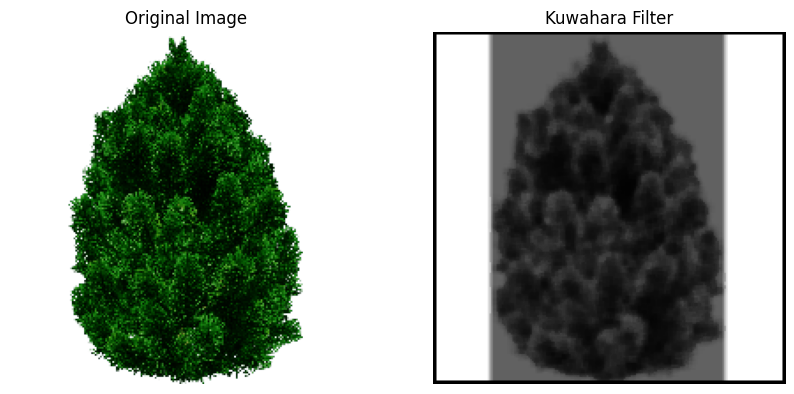

In [4]:
import matplotlib.pyplot as plt

input_image = Image.open('tree.png')

# Apply the Kuwahara filter
filtered_image = kuwahara_filter(input_image)

# Display the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(input_image, cmap='gray')
plt.axis('off')  # Hide axis

plt.subplot(1, 2, 2)
plt.title('Kuwahara Filter')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')  # Hide axis

plt.show()